In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras.datasets import mnist


In [12]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [10]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [13]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(x_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0400 - accuracy: 0.9865 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 2/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 3/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.0410 - val_accuracy: 0.9887


In [15]:
import matplotlib.pyplot as plt

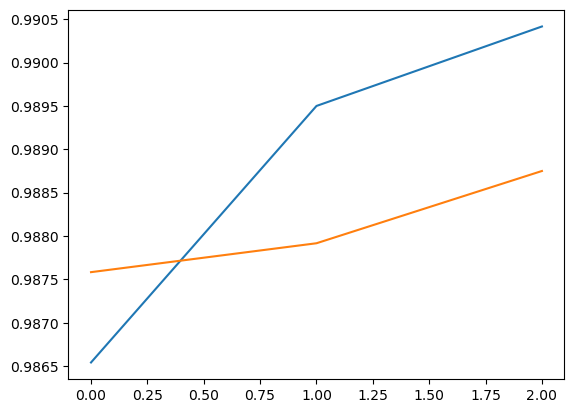

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])